In [1]:
import pandas as pd
import numpy as np
import time
import json
import statistics
import matplotlib.pyplot as plt
import scipy.spatial
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [2]:
def save_data(data, file_to_save_to):
        """takes in a filename to save to"""
        with open(file_to_save_to, 'w') as outfile:
            json.dump(data, outfile)

In [3]:
def open_save_data(file_to_open):
        """takes in a json file to open
           return a list of dictionaries"""
        with open(file_to_open) as datajson:
            new_data =json.load(datajson)
        return new_data

In [4]:
def graph_position(position):
    im = plt.imread('map11.png')
    x = position[0]
    y = 14980 - position[1]
    x_min, x_max = (-120, -120)
    y_min, y_max = (14870, 14980)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlim(x_max, y_max)
    ax.set_ylim(y_min, x_min)
    ax.imshow(im, interpolation='none', extent=[x_max, y_max, y_min, x_min])
    ax.plot(x,y,'o', color = 'yellow')

In [17]:
challengers = open_save_data('challengers.json')
challenger_summoners = open_save_data('challenger_summoners.json')

In [6]:
top100_matchinfo_timeline = open_save_data('top100_matchinfo_timeline.json')

In [18]:
top100 = [a for a in challengers['entries'] if a['leaguePoints']>365]
top100_sumid = [x['summonerId'] for x in top100]

In [19]:
top20 = [a for a in challengers['entries'] if a['leaguePoints']>682]
top20_sumid = [x['summonerId'] for x in top20]

In [20]:
for b in challengers['entries']:
    if b['summonerId'] == 'JDtbLNgwHu-kIUTSRrSYtlfCS7wXtFe7x5aYrWrBdGS_XbY':
        print(b)

In [21]:
top100_summoners = []
for sum_id in top100_sumid:
    for chal in challenger_summoners:
        if sum_id == chal['id']:
            top100_summoners.append(chal)

In [30]:
print(len(top100))
print(len(top100_sumid))
print(len(top100_summoners))

100
100
100


In [23]:
top20_summoners = []
for sum_id in top20_sumid:
    for chal in challenger_summoners:
        if sum_id == chal['id']:
            top20_summoners.append(chal)

In [24]:
len(top20_summoners)

20

In [25]:
top20_summoners

[{'id': 'anCm1ECrc5ASITwVJzCyLRSRAy9LsdXe_58m9JUOHy2jsII',
  'accountId': 'G0ZjmfzwtQmoM4MQoP7pt4Iz2yvDRDjb7-CwPW6ivcLDPBs',
  'puuid': 'UCjE8dX9vlD5slPWOcTIWGi090ttUPsdAwfV9bCYiP2VNn_jPKPoqt-OHGA7A6j72SDMOq21IiSRWw',
  'name': 'SHERNICE',
  'profileIconId': 762,
  'revisionDate': 1555913680000,
  'summonerLevel': 50},
 {'id': 'p_BbTtEPu-ZWWlBdb8YVz058emuh5xkdG0Zymt5Dk9uAds4',
  'accountId': 'St-DQpVfUkFyC-noBS1cin7P7WdzNyNvAINPoOYx0uYaFw',
  'puuid': '5F2jiliWJNaqo0Bgqu_m0djFN_RoqH9kpegLv-AymcLuSwpumfUfpjbDv9I-H09vT78awxj6clPaJQ',
  'name': 'Pants are Dragon',
  'profileIconId': 1456,
  'revisionDate': 1556148034000,
  'summonerLevel': 182},
 {'id': 'QBcnvo-ROqBJR2HxWEL2RUwJYliLjKgQSWaJlCHWV1R6bt4',
  'accountId': 'cnkL5JWt04Yd59YXbAkFzmBZ9bpWz1hGyC2EszsMv0vAH5c',
  'puuid': 'aINNyK1aMHo8ciw_vvr2sf0MhM88CsC9Z18Snfi4sopmxjgJQQTJOEVdNrjTCiWeogGWDwrrb3QFyA',
  'name': 'TF Blade',
  'profileIconId': 2075,
  'revisionDate': 1555354366000,
  'summonerLevel': 140},
 {'id': 'tshK9x3NKeWoNXzVQ

In [26]:
top20_accid = [x['accountId'] for x in top20_summoners]
top20_accid

['G0ZjmfzwtQmoM4MQoP7pt4Iz2yvDRDjb7-CwPW6ivcLDPBs',
 'St-DQpVfUkFyC-noBS1cin7P7WdzNyNvAINPoOYx0uYaFw',
 'cnkL5JWt04Yd59YXbAkFzmBZ9bpWz1hGyC2EszsMv0vAH5c',
 'sdme5CyRdcASXpuT7N_xW_WiunZ4QrwjgHPS6cXYBIiipB0',
 '_YdV_hjPW8JfF2rdj1cCNwiLX8-IDWCltF22l2zkykOaX3E',
 'b5zgHi0W01dLwH7QUlm5mUEaqFk6qv4OYWuRulwVT3lQfMXiDn4e9pN9',
 'GsjOc_z5XYIHXS9gMWLvx02srbUHuU1GV_Kezp-YJdFHxFs',
 '8oCV_CT6GcfovpNUTYir3IvNTE1Zkh1qWG89UUdfa_sCqts',
 'OE0iIhcF0VhpxM8yAmGUbIh2IvalRfFnm6QiQ04o-l7QyQ',
 'iIH7tMPgzezXtSErLiL-H78tPrOsSv6KBCbvDUzC1LtKnQ',
 '9JU9qic5iVNm8znG1C2oQ8ZaHduJ553ov4ePnMLW0MU_nkc',
 'MvmQClVSTBa0nKPxXmJHmdqhKrUBvXIFVkM200vTeCY',
 's_7IPMHhGgIYvN8HSvu-i3dNSM3_i6FxXc2-6qREEwJDQrs',
 'ch3wy7Mo3tTbD3EBNQctAiTqyCotvM0YwH7mwZGBpzVglsc',
 'IKgO1xgoE8zHPO-tQs5tnALycF9TjamCJKVYvbyyu9MVHuw',
 '12ryxb9QjVpjIFVUee0WIXvAMd6oGcRCRlGF2EnRBIxBK1n8PajQm2J3',
 'wADVR3UAkOk53DJbcN7nWZMuWqj1JZlG8E-ACywcNI2u-avn5RzPXJ7R',
 'OHtq_CBgLTZR3LqLsfFjymGqEZPYHryREMX_FyhMlCS7C-E',
 '0yOi6zxm9Z2crsA0rIF8-deXxRe2sYcUTMDzFFISKf

In [7]:
match_idlist = []
for a in top100_matchinfo_timeline:
    for b in top100_matchinfo_timeline[a]['match_info']:
        match_idlist.append(top100_matchinfo_timeline[a]['match_info'][b]['gameId'])

In [8]:
len(set(match_idlist))

6817

In [9]:
len(match_idlist)

10000

In [10]:
top100_matchinfo_timeline['b5zgHi0W01dLwH7QUlm5mUEaqFk6qv4OYWuRulwVT3lQfMXiDn4e9pN9']['match_timeline']['3028776211']




{'status': {'message': 'Service unavailable', 'status_code': 503}}

In [11]:
top100_matchinfo_timeline['b5zgHi0W01dLwH7QUlm5mUEaqFk6qv4OYWuRulwVT3lQfMXiDn4e9pN9']['match_info']['3028913118']


{'gameId': 3028913118,
 'platformId': 'NA1',
 'gameCreation': 1556247378107,
 'gameDuration': 1460,
 'queueId': 420,
 'mapId': 11,
 'seasonId': 13,
 'gameVersion': '9.8.270.9450',
 'gameMode': 'CLASSIC',
 'gameType': 'MATCHED_GAME',
 'teams': [{'teamId': 100,
   'win': 'Fail',
   'firstBlood': False,
   'firstTower': True,
   'firstInhibitor': False,
   'firstBaron': False,
   'firstDragon': True,
   'firstRiftHerald': False,
   'towerKills': 2,
   'inhibitorKills': 0,
   'baronKills': 0,
   'dragonKills': 1,
   'vilemawKills': 0,
   'riftHeraldKills': 0,
   'dominionVictoryScore': 0,
   'bans': [{'championId': 24, 'pickTurn': 1},
    {'championId': 421, 'pickTurn': 2},
    {'championId': 92, 'pickTurn': 3},
    {'championId': 84, 'pickTurn': 4},
    {'championId': 119, 'pickTurn': 5}]},
  {'teamId': 200,
   'win': 'Win',
   'firstBlood': True,
   'firstTower': False,
   'firstInhibitor': True,
   'firstBaron': True,
   'firstDragon': False,
   'firstRiftHerald': True,
   'towerKills':

In [12]:
#failed requests
del top100_matchinfo_timeline['b5zgHi0W01dLwH7QUlm5mUEaqFk6qv4OYWuRulwVT3lQfMXiDn4e9pN9']['match_timeline']['3028862756']
del top100_matchinfo_timeline['b5zgHi0W01dLwH7QUlm5mUEaqFk6qv4OYWuRulwVT3lQfMXiDn4e9pN9']['match_timeline']['3028890557']
del top100_matchinfo_timeline['b5zgHi0W01dLwH7QUlm5mUEaqFk6qv4OYWuRulwVT3lQfMXiDn4e9pN9']['match_timeline']['3028776211']

In [13]:
top100_matchinfo_timeline['JDtbLNgwHu-kIUTSRrSYtlfCS7wXtFe7x5aYrWrBdGS_XbY']['match_timeline']['3027521652']['frames'][4]['events'][10]['position']['x']


7626

In [14]:
def get_top_x(top_ids):
    top100_df = []
    lst2 = []
    accids = ['JDtbLNgwHu-kIUTSRrSYtlfCS7wXtFe7x5aYrWrBdGS_XbY']
    for accid in top_ids:
        for matchid in top100_matchinfo_timeline[accid]['match_timeline']:
            for frame in range(1, len(top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'])):
                hold2 = {}
                for event in range(len(top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'])):
                    hold = {}
                    hold['matchid'] = matchid
                    hold['frame'] = frame

                    if top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event]['type'] not in ['SKILL_LEVEL_UP', 'ITEM_UNDO','WARD_PLACED', 'ITEM_SOLD', 'ITEM_DESTROYED', 'WARD_KILL']:
                        hold['event'] = top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event]['type']
                        if hold['event'] =='BUILDING_KILL':
                            hold['tower_type'] = top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event]['towerType']
                        elif hold['event'] == 'ELITE_MONSTER_KILL':
                            hold['monster_type'] = top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event]['monsterType']
                        hold['timestamp'] = top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event]['timestamp']               

                        if 'participantId' in top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event].keys():
                            hold['participant'] = top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event]['participantId']
                        elif 'killerId' in top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event].keys():
                            hold['participant'] = top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event]['killerId']
                        elif 'creatorId' in top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event].keys():
                            hold['participant'] = top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event]['creatorId']
                        if 'assistingParticipantIds' in top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event].keys():
                            hold['assisting_participants'] = top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event]['assistingParticipantIds']
                        if 'position' in top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event].keys():
                            hold['position'] = (top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event]['position']['x'],top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['events'][event]['position']['y'])
                        else:
                            for part_frame in top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['participantFrames']:
                                if top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['participantFrames'][part_frame]['participantId'] == hold['participant']:
                                    if 'position' in top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['participantFrames'][part_frame].keys():
                                        hold['position'] = (top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['participantFrames'][part_frame]['position']['x'],top100_matchinfo_timeline[accid]['match_timeline'][matchid]['frames'][frame]['participantFrames'][part_frame]['position']['y'])

                        for participant in range(len(top100_matchinfo_timeline[accid]['match_info'][matchid]['participantIdentities'])):
                            if top100_matchinfo_timeline[accid]['match_info'][matchid]['participantIdentities'][participant]['participantId'] == hold['participant']:
                                hold['summonerName'] = top100_matchinfo_timeline[accid]['match_info'][matchid]['participantIdentities'][participant]['player']['summonerName']
                                hold['win'] = top100_matchinfo_timeline[accid]['match_info'][matchid]['participants'][participant]['stats']['win']
                                hold['role'] = top100_matchinfo_timeline[accid]['match_info'][matchid]['participants'][participant]['timeline']['role']
                                hold['lane'] = top100_matchinfo_timeline[accid]['match_info'][matchid]['participants'][participant]['timeline']['lane']

                        top100_df.append(hold)

    return top100_df

In [27]:
top100_df = pd.DataFrame(top100_df)


NameError: name 'top100_df' is not defined

In [28]:
pd.set_option('display.max_rows', 200)

In [29]:
top100_df.loc[top100_df.matchid == '3027542284']

NameError: name 'top100_df' is not defined

In [285]:
test_player = top100_df.loc[(top100_df.matchid == '3027542284') & (top100_df.participant == 1)]
test_player

,assisting_participants,event,frame,lane,matchid,monster_type,participant,position,role,summonerName,timestamp,tower_type,win
13,NaN,ITEM_PURCHASED,1,BOTTOM,3027542284,NaN,1,"(11025, 3306)",DUO_CARRY,Yenˉ,5715,NaN,False
15,NaN,ITEM_DESTROYED,1,BOTTOM,3027542284,NaN,1,"(11025, 3306)",DUO_CARRY,Yenˉ,7004,NaN,False
16,NaN,ITEM_PURCHASED,1,BOTTOM,3027542284,NaN,1,"(11025, 3306)",DUO_CARRY,Yenˉ,8294,NaN,False
17,NaN,ITEM_PURCHASED,1,BOTTOM,3027542284,NaN,1,"(11025, 3306)",DUO_CARRY,Yenˉ,8657,NaN,False
37,"[2, 4, 5]",CHAMPION_KILL,2,BOTTOM,3027542284,NaN,1,"(9894, 7314)",DUO_CARRY,Yenˉ,86538,NaN,False
47,NaN,ITEM_DESTROYED,4,BOTTOM,3027542284,NaN,1,"(13371, 3280)",DUO_CARRY,Yenˉ,235284,NaN,False
77,NaN,ITEM_PURCHASED,6,BOTTOM,3027542284,NaN,1,"(8632, 6328)",DUO_CARRY,Yenˉ,310645,NaN,False
78,NaN,ITEM_PURCHASED,6,BOTTOM,3027542284,NaN,1,"(8632, 6328)",DUO_CARRY,Yenˉ,312232,NaN,False
79,NaN,ITEM_PURCHASED,6,BOTTOM,3027542284,NaN,1,"(8632, 6328)",DUO_CARRY,Yenˉ,313322,NaN,False
91,NaN,ITEM_DESTROYED,7,BOTTOM,3027542284,NaN,1,"(9858, 1248)",DUO_CARRY,Yenˉ,371168,NaN,False


In [287]:
top100_df.loc[top100_df.lane == 'TOP']

,assisting_participants,event,frame,lane,matchid,monster_type,participant,position,role,summonerName,timestamp,tower_type,win
0,NaN,ITEM_PURCHASED,1,TOP,3027542284,NaN,7,"(3078, 10886)",SOLO,IlIIllllIIllIll,3568,NaN,True
1,NaN,ITEM_PURCHASED,1,TOP,3027542284,NaN,7,"(3078, 10886)",SOLO,IlIIllllIIllIll,4427,NaN,True
21,NaN,ITEM_PURCHASED,1,TOP,3027542284,NaN,3,"(414, 563)",SOLO,live and learn,10211,NaN,False
24,NaN,ITEM_PURCHASED,1,TOP,3027542284,NaN,3,"(414, 563)",SOLO,live and learn,10972,NaN,False
26,NaN,ITEM_PURCHASED,1,TOP,3027542284,NaN,3,"(414, 563)",SOLO,live and learn,11170,NaN,False
41,NaN,ITEM_DESTROYED,4,TOP,3027542284,NaN,7,"(1621, 11114)",SOLO,IlIIllllIIllIll,210689,NaN,True
59,NaN,ITEM_PURCHASED,5,TOP,3027542284,NaN,3,"(1752, 12410)",SOLO,live and learn,265276,NaN,False
60,NaN,ITEM_DESTROYED,5,TOP,3027542284,NaN,3,"(1752, 12410)",SOLO,live and learn,265276,NaN,False
61,NaN,ITEM_PURCHASED,5,TOP,3027542284,NaN,3,"(1752, 12410)",SOLO,live and learn,271258,NaN,False
84,NaN,ITEM_PURCHASED,6,TOP,3027542284,NaN,7,"(3417, 10332)",SOLO,IlIIllllIIllIll,317985,NaN,True


In [31]:
top20_df = get_top_x(top20_accid)
top20_df

[{'matchid': '3026329038',
  'frame': 1,
  'event': 'ITEM_PURCHASED',
  'timestamp': 3496,
  'participant': 6,
  'position': (10416, 12156),
  'summonerName': 'SHERNICE',
  'win': True,
  'role': 'NONE',
  'lane': 'JUNGLE'},
 {'matchid': '3026329038',
  'frame': 1,
  'event': 'ITEM_PURCHASED',
  'timestamp': 3529,
  'participant': 1,
  'position': (2849, 1682),
  'summonerName': 'OveroVerovEroveR',
  'win': False,
  'role': 'NONE',
  'lane': 'JUNGLE'},
 {'matchid': '3026329038',
  'frame': 1,
  'event': 'ITEM_PURCHASED',
  'timestamp': 3728,
  'participant': 6,
  'position': (10416, 12156),
  'summonerName': 'SHERNICE',
  'win': True,
  'role': 'NONE',
  'lane': 'JUNGLE'},
 {'matchid': '3026329038',
  'frame': 1,
  'event': 'ITEM_PURCHASED',
  'timestamp': 3860,
  'participant': 1,
  'position': (2849, 1682),
  'summonerName': 'OveroVerovEroveR',
  'win': False,
  'role': 'NONE',
  'lane': 'JUNGLE'},
 {'matchid': '3026329038',
  'frame': 1,
  'event': 'ITEM_PURCHASED',
  'timestamp': 3

In [32]:
def blueside(df):
    holding = []
    for a in df:
        if a['participant']==1 or a['participant']==2 or a['participant']==3 or a['participant']==4 or a['participant']==5:
            holding.append(a)
    return holding

def redside(df):
    holding = []
    for a in df:
        if a['participant']==6 or a['participant']==7 or a['participant']==8 or a['participant']==9 or a['participant']==10:
            holding.append(a)
    return holding


In [33]:
def set_blue_item_purchase_position(df):
    for b in df:
        if b['event'] == 'ITEM_PURCHASED':
            b['position'] = (500,800)
    return df

In [34]:
toplane_position = (2000, 13000)
midlane_position = (7500, 7600)
botland_position = (13000, 2200)
top_mid_bot_posi = [(2000, 13000),(7500, 7600),(13000, 2200)]

In [36]:
top20_pddf = pd.DataFrame(top20_df)


In [37]:
len(top20_pddf)

534664

In [38]:
top20_pddf.summonerName.value_counts()

NA UZl              6854
tarzaned5           5794
TSM Johnsun         5093
NaSecretSupport     4780
SHERNICE            4401
Yeonbee             4117
Sophist Sage1       4039
NucIear             4037
PantsAreFacebook    4017
Santorin            3906
TSM Zven            3743
Pants are Dragon    3648
SHERNFlRE           3549
TF Blade            3376
The Tank Man        3287
TSM Ablazeolive     3271
iKingVex            3120
Sheng Tzen          2928
cond1               2539
Aipotu              2304
JordanTheBoss       2302
Zyko                1955
Srkenji             1809
insanityxxx         1714
Asyc                1691
Paradiser           1463
txme7               1461
Forest Within       1453
TheOddOrange        1453
Ugandan Royalty     1447
NAsFinest           1437
KatEvolved          1429
Shiphtur            1396
Anivia Kid          1369
Cat Tears           1361
V1per1              1350
T1 OK GOOD YES      1347
Miyiu               1290
1 Shady             1288
Tempos              1210


In [39]:
top20_pddf.lane.value_counts()

BOTTOM    172070
JUNGLE    110300
MIDDLE    101531
TOP        88953
NONE       55953
Name: lane, dtype: int64

In [40]:
top20_pddf.role.value_counts()

SOLO           149477
DUO_SUPPORT    140890
NONE           110300
DUO_CARRY       87689
DUO             40451
Name: role, dtype: int64

In [59]:
toplane20_blue = blueside(top20_df)
toplane20_blue = set_blue_item_purchase_position(toplane20_blue)
toplane20_blue = pd.DataFrame(toplane20_blue)
toplane20_blue = toplane20_blue[toplane20_blue.lane =="TOP"]
toplane20_blue_win = toplane20_blue.win
toplane20_blue = toplane20_blue.drop(['assisting_participants', 'frame', 'participant', 'win', 'role' ], axis=1)

toplane20_blue

,event,lane,matchid,monster_type,position,summonerName,timestamp,tower_type
7,ITEM_PURCHASED,TOP,3026329038,NaN,"(500, 800)",Riot H4xDefender,21036,NaN
8,ITEM_PURCHASED,TOP,3026329038,NaN,"(500, 800)",Riot H4xDefender,21697,NaN
29,ITEM_PURCHASED,TOP,3026329038,NaN,"(500, 800)",Riot H4xDefender,291719,NaN
30,ITEM_PURCHASED,TOP,3026329038,NaN,"(500, 800)",Riot H4xDefender,292646,NaN
31,ITEM_PURCHASED,TOP,3026329038,NaN,"(500, 800)",Riot H4xDefender,294000,NaN
40,ITEM_PURCHASED,TOP,3026329038,NaN,"(500, 800)",Riot H4xDefender,336756,NaN
45,ITEM_PURCHASED,TOP,3026329038,NaN,"(500, 800)",Riot H4xDefender,462587,NaN
47,ITEM_PURCHASED,TOP,3026329038,NaN,"(500, 800)",Riot H4xDefender,473944,NaN
54,CHAMPION_KILL,TOP,3026329038,NaN,"(913, 10582)",Riot H4xDefender,583498,NaN
64,ITEM_PURCHASED,TOP,3026329038,NaN,"(500, 800)",Riot H4xDefender,658470,NaN


In [60]:
# toplane20_blue = pd.concat([toplane20_blue,pd.get_dummies(toplane20_blue.monster_type),pd.get_dummies(toplane20_blue.tower_type), pd.get_dummies(toplane20_blue.event)], axis =1)
# toplane20_blue.rename(columns={'UNDEFINED_TURRET':'INNER_TURRET',}, inplace=True)
toplane20_blue = toplane20_blue.drop(['monster_type', 'tower_type', 'lane',], axis=1)



In [61]:
toplane20_blue

,event,matchid,position,summonerName,timestamp
7,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,21036
8,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,21697
29,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,291719
30,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,292646
31,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,294000
40,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,336756
45,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,462587
47,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,473944
54,CHAMPION_KILL,3026329038,"(913, 10582)",Riot H4xDefender,583498
64,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,658470


In [45]:
def distance_to_lanes_calc(df):
    dists = df.position.apply(lambda x: scipy.spatial.distance.cdist([x],top_mid_bot_posi))
    to_top = []
    to_mid = []
    to_bot = []
    for a in dists:
        to_top.append(a[0][0])
        to_mid.append(a[0][1])
        to_bot.append(a[0][2])
    return [to_top, to_mid, to_bot]

In [46]:
top_dist = distance_to_lanes_calc(toplane20_blue)

In [47]:
len(top_dist[0])

42347

In [62]:
toplane20_blue['to_top'] = top_dist[0]
toplane20_blue['to_mid'] = top_dist[1]
toplane20_blue['to_bot'] = top_dist[2]

In [63]:
toplane20_blue.drop('position', axis =1)

,event,matchid,summonerName,timestamp,to_top,to_mid,to_bot
7,ITEM_PURCHASED,3026329038,Riot H4xDefender,21036,12291.867230,9759.098319,12578.155668
8,ITEM_PURCHASED,3026329038,Riot H4xDefender,21697,12291.867230,9759.098319,12578.155668
29,ITEM_PURCHASED,3026329038,Riot H4xDefender,291719,12291.867230,9759.098319,12578.155668
30,ITEM_PURCHASED,3026329038,Riot H4xDefender,292646,12291.867230,9759.098319,12578.155668
31,ITEM_PURCHASED,3026329038,Riot H4xDefender,294000,12291.867230,9759.098319,12578.155668
40,ITEM_PURCHASED,3026329038,Riot H4xDefender,336756,12291.867230,9759.098319,12578.155668
45,ITEM_PURCHASED,3026329038,Riot H4xDefender,462587,12291.867230,9759.098319,12578.155668
47,ITEM_PURCHASED,3026329038,Riot H4xDefender,473944,12291.867230,9759.098319,12578.155668
54,CHAMPION_KILL,3026329038,Riot H4xDefender,583498,2651.092794,7230.552745,14708.959617
64,ITEM_PURCHASED,3026329038,Riot H4xDefender,658470,12291.867230,9759.098319,12578.155668


In [64]:
toplane20_blue

,event,matchid,position,summonerName,timestamp,to_top,to_mid,to_bot
7,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,21036,12291.867230,9759.098319,12578.155668
8,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,21697,12291.867230,9759.098319,12578.155668
29,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,291719,12291.867230,9759.098319,12578.155668
30,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,292646,12291.867230,9759.098319,12578.155668
31,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,294000,12291.867230,9759.098319,12578.155668
40,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,336756,12291.867230,9759.098319,12578.155668
45,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,462587,12291.867230,9759.098319,12578.155668
47,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,473944,12291.867230,9759.098319,12578.155668
54,CHAMPION_KILL,3026329038,"(913, 10582)",Riot H4xDefender,583498,2651.092794,7230.552745,14708.959617
64,ITEM_PURCHASED,3026329038,"(500, 800)",Riot H4xDefender,658470,12291.867230,9759.098319,12578.155668


In [65]:
%matplotlib inline

toplane20_blue.set_index('timestamp', inplace=True)


In [66]:
toplane20_test = toplane20_blue[toplane20_blue.event != 'ITEM_PURCHASED']


In [67]:
toplane20_test.drop(['position', 'event'], axis =1, inplace=True)
# toplane20_test.set_index('timestamp', inplace=True)
toplane20_test

,matchid,summonerName,to_top,to_mid,to_bot
timestamp,,,,,
583498,3026329038,Riot H4xDefender,2651.092794,7230.552745,14708.959617
1125607,3026329038,Riot H4xDefender,2477.649895,7035.676869,14549.321256
1307753,3026329038,Riot H4xDefender,7747.546967,2529.206200,8461.045089
1718767,3026329038,Riot H4xDefender,4238.414798,3571.408686,11241.252599
147796,3026350115,PeepoClownWalk,7406.153658,2722.482690,8876.525897
1001955,3026350115,PeepoClownWalk,8278.413193,1716.136650,7495.206802
1127745,3026350115,PeepoClownWalk,5052.113320,5778.914171,12652.582701
1283596,3026350115,PeepoClownWalk,11516.656199,3822.299046,3925.120380
1511468,3026350115,PeepoClownWalk,9690.123477,5773.568481,9570.250415


In [53]:
toplane20_test.summonerName.value_counts()[0:100].keys()

Index(['JordanTheBoss', 'TF Blade', 'V1per1', 'Lourlo', 'Psychopathic Top',
       'TSM Ablazeolive', 'Solarbacca', 'cuul crab', '2Dimes', 'Stonkley',
       'PhenomEX', 'moosehater', 'Brown Man Darius', 'the sexy kane',
       'Adrian Riven', 'Darshan', 'Brandini', 'Gangplank Main', 'CatOnThyRoof',
       'Con sentiment', 'Allorim', 'MistyStumpey', 'Bobjenkins', 'CloneSheep9',
       'KINGSLAYER RYKEN', 'Kuncept', '3in1warrior', 'xBlotter',
       'ULookSoCharming', 'BIUKEEEEEEEEEEE', 'Elodaddy ZzeR', '5mi', 'Niles',
       'Licorice', 'Taner Won', 'ıdol', 'Ligma Penis', 'ˉNemesis', 'Zamir',
       'ddddddddd', 'smallfatgirl', 'VX15555656945', 'Vortekexy', 'HyBriDZz',
       'UndefeatedOne', 'canipi', 'Doxa', 'Revenge', 'roguebunny0', 'Avano',
       'WX 364639217', 'lnaban', 'fox solo', 'insanityxxx', 'Caristinn',
       'llIIIIIIIIlIIlI', 'BBQ Babjwo', 'SmebSsumdayMarin', 'Oppa omg',
       'xBIotter', 'JimmytheSlayer', 'T0pMEmE', 'Veiv', 'txme7', 'gamerguy22',
       'Dhokla', 'Str

In [54]:
summonerNames = toplane20_test.summonerName.value_counts()[0:100].keys()
summonerNames

Index(['JordanTheBoss', 'TF Blade', 'V1per1', 'Lourlo', 'Psychopathic Top',
       'TSM Ablazeolive', 'Solarbacca', 'cuul crab', '2Dimes', 'Stonkley',
       'PhenomEX', 'moosehater', 'Brown Man Darius', 'the sexy kane',
       'Adrian Riven', 'Darshan', 'Brandini', 'Gangplank Main', 'CatOnThyRoof',
       'Con sentiment', 'Allorim', 'MistyStumpey', 'Bobjenkins', 'CloneSheep9',
       'KINGSLAYER RYKEN', 'Kuncept', '3in1warrior', 'xBlotter',
       'ULookSoCharming', 'BIUKEEEEEEEEEEE', 'Elodaddy ZzeR', '5mi', 'Niles',
       'Licorice', 'Taner Won', 'ıdol', 'Ligma Penis', 'ˉNemesis', 'Zamir',
       'ddddddddd', 'smallfatgirl', 'VX15555656945', 'Vortekexy', 'HyBriDZz',
       'UndefeatedOne', 'canipi', 'Doxa', 'Revenge', 'roguebunny0', 'Avano',
       'WX 364639217', 'lnaban', 'fox solo', 'insanityxxx', 'Caristinn',
       'llIIIIIIIIlIIlI', 'BBQ Babjwo', 'SmebSsumdayMarin', 'Oppa omg',
       'xBIotter', 'JimmytheSlayer', 'T0pMEmE', 'Veiv', 'txme7', 'gamerguy22',
       'Dhokla', 'Str

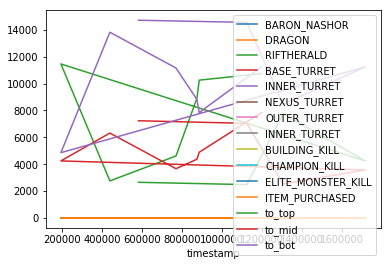

In [55]:
toplane20_test[toplane20_test.summonerName == 'Riot H4xDefender'].plot()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


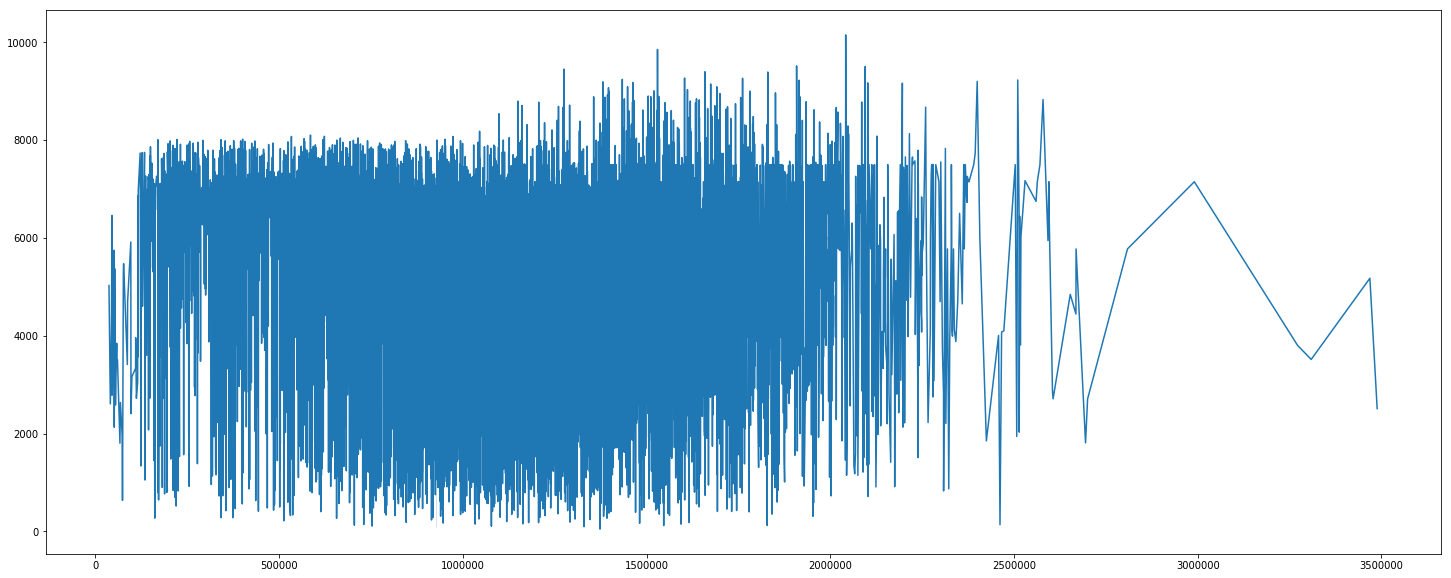

In [56]:
plt.figure(figsize=(25, 10))
sns.lineplot(data = toplane20_test.to_mid)

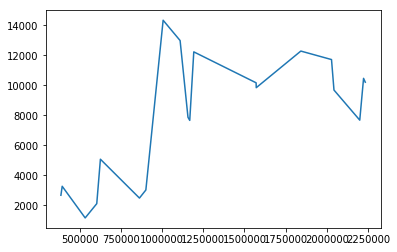

In [57]:
sns.lineplot(data=toplane20_test[toplane20_test.summonerName == 'Juvenile'].to_top)

In [68]:
toplane20_test.columns

Index(['matchid', 'summonerName', 'to_top', 'to_mid', 'to_bot'], dtype='object')

In [69]:
toplane20_test[toplane20_test.index.duplicated()]


,matchid,summonerName,to_top,to_mid,to_bot
timestamp,,,,,
333178,3025830139,Soulmario,2309.510771,6898.046100,14444.799756
573730,3025830139,Soulmario,5539.049016,4044.090009,10993.100745
575052,3025830139,Soulmario,6198.547088,4259.364507,10801.962137
921620,3025830139,Soulmario,13354.133817,5962.104494,3403.011901
572069,3025410807,Litchi Redtea,7437.835438,2693.064426,8831.975770
715516,3025410807,Litchi Redtea,8338.770473,1577.876104,7366.430139
1292064,3025410807,Litchi Redtea,7478.686583,1277.948747,8133.606396
1768025,3025410807,Litchi Redtea,5944.710927,2100.949309,9607.725433
1864241,3025410807,Litchi Redtea,3712.881496,4082.828554,11763.226131


In [70]:
toplane20_test = toplane20_test[~toplane20_test.index.duplicated()]

In [71]:
toplane20_ts = []
toplane20_group = toplane20_test.groupby('summonerName')
for name in summonerNames:
    toplane20_ts.append(toplane20_group.get_group(name).to_top.values)

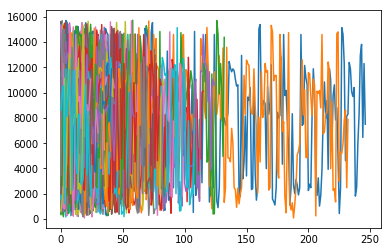

In [72]:
timeSeries = []
ax= None
for arr in toplane20_ts:

    timeSeries.append(arr)
    # We use seaborn to plot what we have
    ax = sns.lineplot(ax=ax, data=arr)

# ax.get_legend().remove()
plt.show()

In [73]:
pd.DataFrame(timeSeries)

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,2312.889319,4733.871566,11306.488403,10240.203611,9131.710957,7882.143934,9717.411435,7704.036929,11643.098643,11553.461473,...,10400.434077,1814.39246,2477.649895,5957.19481,8286.196836,12954.252468,13810.99714,6452.29711,12291.948788,7498.442505
1,2097.068668,2832.669589,11644.455848,8729.765232,12291.948788,11874.870947,11168.865878,9837.366009,11725.556362,12191.296650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1084.055810,2477.649895,4941.722878,5957.194810,5270.286994,7938.324760,9389.691475,2477.649895,11503.292137,12291.948788,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2477.649895,10405.591766,11976.986599,1773.010152,4198.586667,4881.594821,6924.664685,8332.806310,9690.123477,2446.090759,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1707.611783,8245.138446,2477.649895,8287.116024,7976.222477,15559.632515,8121.865057,3662.937209,1130.110172,2477.649895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,13438.591184,7963.768266,7639.277453,7995.306873,8339.762706,9437.736858,15366.585990,15031.919172,7459.200024,7276.799434,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,924.333814,2477.649895,324.776846,7765.637707,8517.248910,8286.196836,14697.959110,4052.879470,10215.429996,9009.665532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,493.973684,1223.415710,1147.324714,791.616700,9364.496783,7693.359344,6562.297464,9679.612027,12614.339024,13085.437593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,710.912090,4251.614399,4287.793488,8983.957758,13256.672018,14593.388263,6963.353359,7381.090705,6281.425634,8982.014585,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5129.103040,2477.649895,7096.611374,5132.878530,10475.808513,9377.334003,8505.872148,9285.639289,6633.194102,2663.588745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
matchids_top = toplane20_test.matchid.unique()

In [84]:
toplane20_match_group.get_group('3026196900').groupby('summonerName').get_group('Competition9').to_top.values

array([ 6365.29724365, 11674.32225014,  5358.79510711,  4442.14767877,
        6098.40192182,  8916.953796  ,  8278.41319336,  4526.7411015 ,
        4001.2003199 ,  4181.21059025,  9992.06830441, 13679.22326011,
       14507.27327929,  4967.26534423, 10102.31260653,  5326.16560013])

In [96]:
toplane20_ts2 = []
toplane20_match_group = toplane20_test.groupby('matchid')

for m_id in matchids_top:
    match_summoner_names = []
    match_summoner_names = toplane20_match_group.get_group(m_id).groupby('summonerName').groups.keys()
    for s_name in match_summoner_names:
        toplane20_ts2.append(toplane20_match_group.get_group(m_id).groupby('summonerName').get_group(s_name).to_top.values)

# for name in summonerNames:
#     toplane20_ts2.append(toplane20_group.get_group(name).to_top.values)


In [95]:
# toplane20_ts2 = pd.DataFrame(toplane20_ts2)


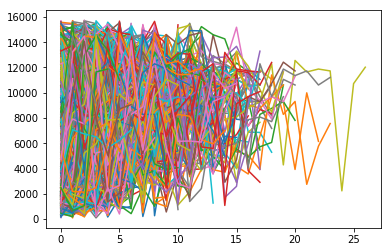

<Figure size 1800x1080 with 0 Axes>

In [98]:
ax= None
for arr in toplane20_ts2:
    # We use seaborn to plot what we have
    ax = sns.lineplot(ax=ax, data=arr)

# ax.get_legend().remove()
plt.figure(figsize=(25, 15))
plt.show()

In [282]:
!pip install tslearn


  Using cached https://files.pythonhosted.org/packages/af/f9/7225f4b1e7ba482b10b544cecf50a0a92bfbbde4ec30fdce824a867ad9ab/tslearn-0.1.29.tar.gz
  Running setup.py bdist_wheel for tslearn ... done
  Stored in directory: /Users/Kevin/Library/Caches/pip/wheels/af/99/f8/2977c3eb9a525f9afe7978fdda948700c1e955225ebdb1f213
Successfully built tslearn


In [77]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score, KShape
from sklearn.model_selection import train_test_split

In [89]:
X_train, y_train = train_test_split(toplane20_ts2)

In [769]:
ks = KShape(n_clusters=3, verbose=True)
y_pred = ks.fit_predict(X_train)

Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster
Resumed because of empty cluster


In [770]:
ks_centers = ks.cluster_centers_
ks_centers = ks_centers[~np.isnan(ks_centers)]
ks_centers

array([ 2421.43841549,  5308.87276171,   816.80413809,  6627.85221622,
        4463.94646025, 11416.5249091 ,  8278.41319336,  7607.64911126,
        6831.07846537,  2586.28092055,  1923.03016097,  7405.72562279,
        2477.64989456,  5787.50395248, 10262.98616388, 10092.55314576,
        3998.09166978,  3876.53982309,  3747.97438625,  4006.86723014])

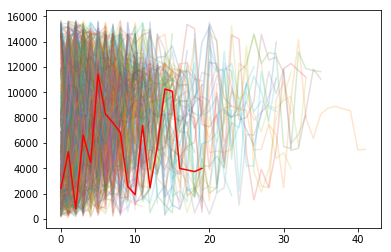

In [812]:
plt.figure()
for xx in X_train:
    plt.plot(xx.ravel(), alpha=.2)
plt.plot(ks_centers.ravel(), "r-")


In [716]:
km = TimeSeriesKMeans(n_clusters=7, metric="dtw")
y_pred = km.fit_predict(X_train)


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/p

Resumed because of empty cluster


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/p

Resumed because of empty cluster


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/p

Resumed because of empty cluster


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/p

Resumed because of empty cluster


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/p

Resumed because of empty cluster


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/p

Resumed because of empty cluster


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/p

Resumed because of empty cluster


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/p

Resumed because of empty cluster


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/p

Resumed because of empty cluster


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
/anaconda3/lib/p

Resumed because of empty cluster


In [99]:
shaped_toplane20_ts2 = []
for a in toplane20_ts2:
    if len(a) >15 & len(a)<30:
        shaped_toplane20_ts2.append(a)
len(shaped_toplane20_ts2)

70

In [100]:
filled_toplane_ts2 = pd.DataFrame(shaped_toplane20_ts2).T.fillna(method='ffill').T

In [637]:
Z = linkage(filled_toplane_ts2, method='single', metric='correlation')

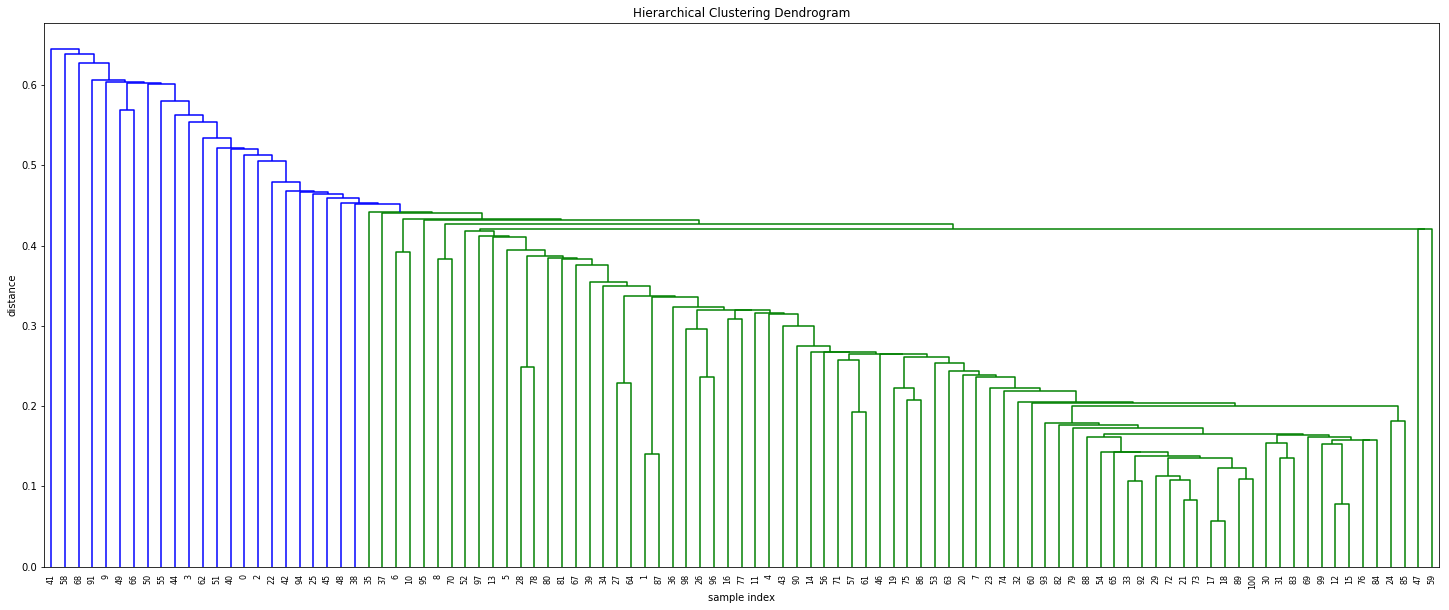

In [639]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [102]:
from sklearn.cluster import AgglomerativeClustering

clusteragg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
clusteragg.fit_predict(filled_toplane_ts2)  


array([0, 1, 0, 3, 3, 1, 1, 4, 0, 1, 4, 1, 2, 2, 2, 2, 0, 4, 3, 0, 2, 3,
       3, 2, 4, 0, 4, 3, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 3, 1, 4, 3, 2,
       2, 0, 0, 4, 1, 0, 0, 0, 2, 4, 3, 4, 0, 2, 4, 3, 1, 4, 4, 3, 1, 3,
       0, 3, 4, 4])

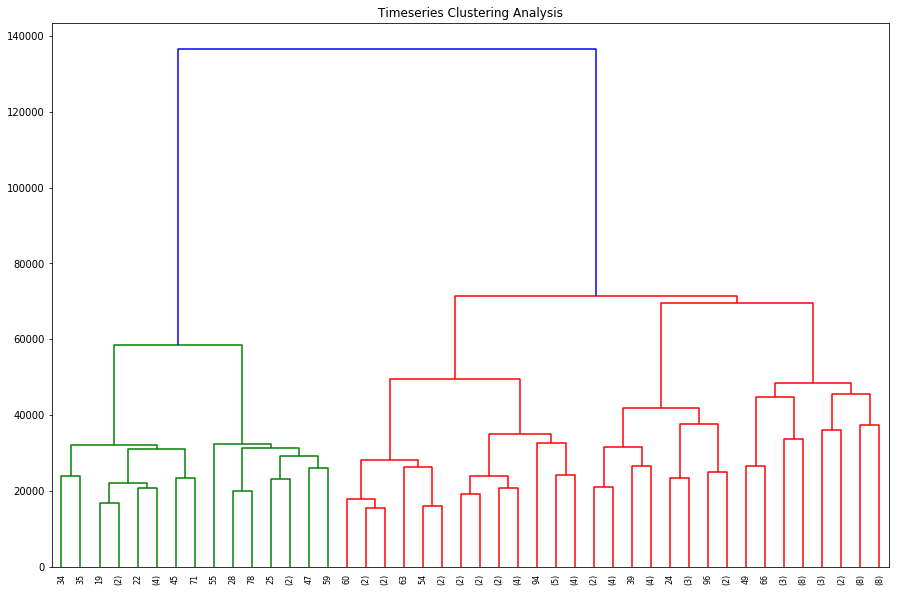

In [817]:
plt.figure(figsize=(15, 10))  
plt.title("Timeseries Clustering Analysis")  
dend = dendrogram(linkage(filled_toplane_ts2, method='ward'), p=5,truncate_mode='level')  

In [679]:
plt.figure(figsize=(10, 7))  
plt.plot(filled_toplane_ts2.loc[:,0],filled_toplane_ts2.loc[:,1], c=cluster.labels_)  

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11da03c80> (for post_execute):


ValueError: RGBA sequence should have length 3 or 4

ValueError: RGBA sequence should have length 3 or 4

<Figure size 720x504 with 1 Axes>

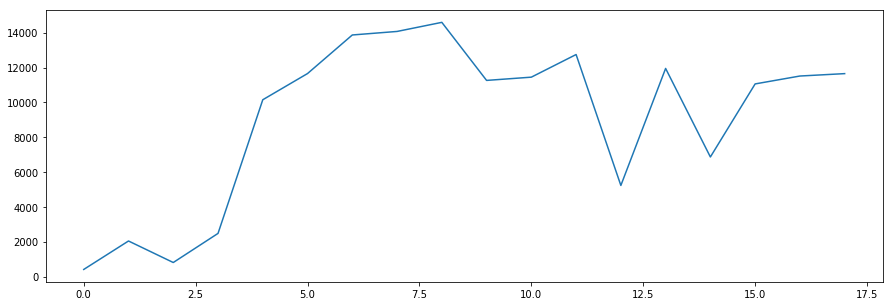

In [810]:

plt.figure(figsize=(15, 5))
sns.lineplot(data = shaped_toplane20_ts2[30])

In [103]:
#converting to a column in a dataframe
clusteragg_groups = pd.DataFrame([2, 1, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 3, 0, 3, 0, 0, 4, 3, 0,
       4, 0, 3, 2, 3, 1, 2, 0, 0, 0, 0, 0, 4, 4, 1, 4, 1, 3, 1, 1, 1, 3,
       1, 4, 1, 2, 4, 1, 1, 3, 1, 4, 0, 2, 3, 1, 1, 2, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 3, 4, 0, 0, 4, 4, 0, 3, 2, 1, 1, 1, 3, 0, 0, 1, 4, 1,
       0, 0, 0, 3, 0, 0, 0, 3, 3, 1, 3, 0, 0])

In [ ]:
toplane20_cluster.index.rename()

In [107]:
temp = filled_toplane_ts2.rename(columns={0:'f'}) #renaming first column temporarily to attach group column

In [108]:
toplane20_cluster = pd.concat([temp, clusteragg_groups], axis =1) #attach cluster group column

In [109]:
toplane20_cluster.rename(columns={0:'group'}, inplace = True) #rename cluster group column

In [110]:
toplane20_cluster.rename(columns={'f':0}, inplace=True) #revert the first column name change

In [111]:
#extracting groups into their own variables for graphing
top20_0 = toplane20_cluster[toplane20_cluster.group == 0]
top20_1 = toplane20_cluster[toplane20_cluster.group == 1]
top20_2 = toplane20_cluster[toplane20_cluster.group == 2]
top20_3 = toplane20_cluster[toplane20_cluster.group == 3]
top20_4 = toplane20_cluster[toplane20_cluster.group == 4]


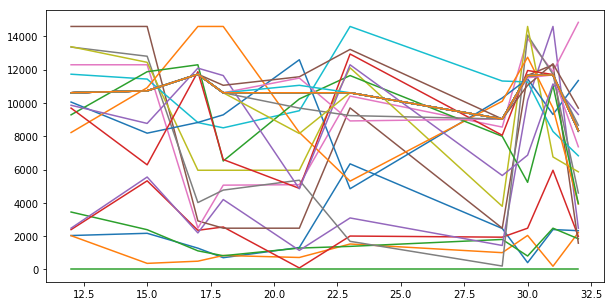

In [890]:
#ploting for first cluster group and limiting it to interpret results better
plt.figure(figsize=(10,5))
plt.plot(top20_0[0:10])

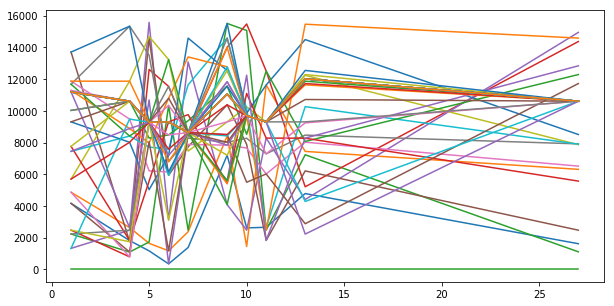

In [891]:
plt.figure(figsize=(10,5))
plt.plot(top20_1[0:10])

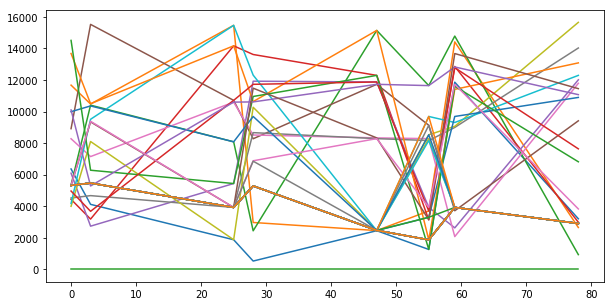

In [892]:
plt.figure(figsize=(10,5))
plt.plot(top20_2[0:10])

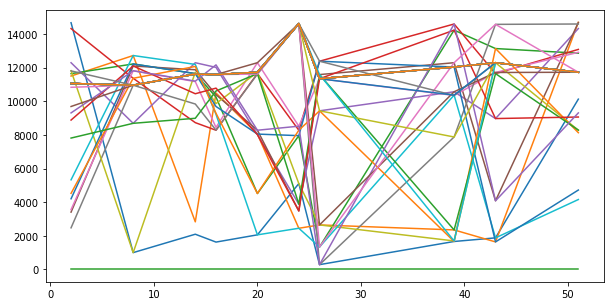

In [893]:
plt.figure(figsize=(10,5))
plt.plot(top20_3[0:10])

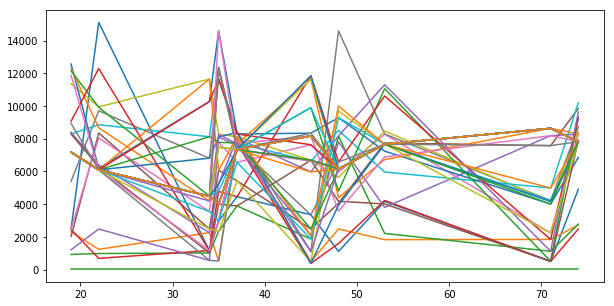

In [894]:
plt.figure(figsize=(10,5))
plt.plot(top20_4[0:10])

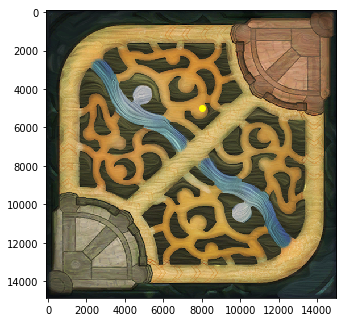

In [6]:
graph_position((8000, 10000))